<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/OrthogonalCollocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Orthogonal Collocation on Finite Elements

Discretization of a continuous time representation allow large-scale nonlinear programming (NLP) solvers to find solutions at specified intervals in a time horizon. There are many names and related techniques for obtaining mathematical relationships between derivatives and non-derivative values. Some of the terms that are relevant to this discussion include orthogonal collocation on finite elements, direct transcription, Gauss pseudospectral method, Gaussian quadrature, Lobatto quadrature, Radau collocation, Legendre polynomials, Chebyshev polynomials, Jacobi polynomials, Laguerre polynomials, any many more. There are many papers that discuss the details of the derivation and theory behind these methods1-5. The purpose of this section is to give a practical introduction to orthogonal collocation on finite elements with Lobatto quadrature for the numerical solution of differential algebraic equations.

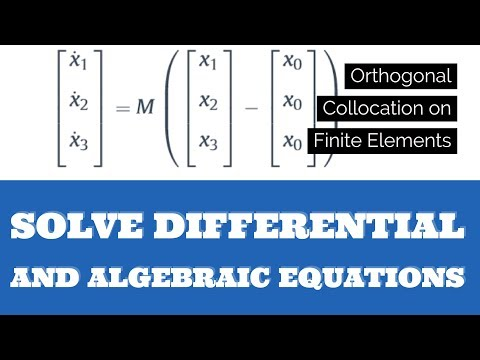

In [0]:
#@markdown Solve DAEs with Orthogonal Collocation on Finite Elements

from IPython.display import YouTubeVideo
YouTubeVideo('/0UL-Y_mEIuI', width=600, height=400)

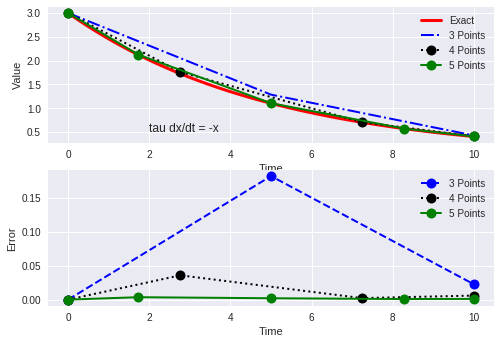

In [0]:
#@markdown ###Orthogonal Collocation 1

# Solve tau dx/dt = -x
import numpy as np
from numpy.linalg import inv

## problem statement
x0 = 3.0  # initial condition
tf = 10.0 # final time
tau = 5.0 # model parameter (time constant)

## analytic solution
time = np.linspace(0,tf,100)
x = x0*np.exp(-time/tau)

## numeric solutions
# 2nd order polynomial (3 points)
t2 = tf * np.array([0.0,0.5,1.0])
N2 = np.array([[0.75,-0.25], \
               [1.00, 0.00]])
M2 = inv(tf * N2)
# Solve linear system of equations by matrix manipulation
P2 = tau*M2 + np.eye(2)
Q2 = np.dot(inv(P2),(tau*M2))
v2 = np.dot(Q2, np.ones(2)*x0)
x2 = np.insert(v2,0,x0)

# 3rd order polynomial (4 points)
t3 = tf * np.array([0.0, \
                    1.0/2.0-np.sqrt(5.0)/10.0, \
                    1.0/2.0+np.sqrt(5.0)/10.0, \
                    1.0])
N3 = np.array([[0.436,-0.281, 0.121], \
               [0.614, 0.064, 0.046], \
               [0.603, 0.230, 0.167]])
M3 = inv(tf * N3)
# Solve linear system of equations by matrix manipulation
P3 = tau * M3 + np.eye(3)
Q3 = np.dot(inv(P3),(tau*M3))
v3 = np.dot(Q3, np.ones(3)*x0)
x3 = np.insert(v3,0,x0)

# 4th order polynomial (5 points)
t4 = tf * np.array([0.0, \
                    1.0/2.0-np.sqrt(21.0)/14.0, \
                    1.0/2.0, \
                    1.0/2.0+np.sqrt(21.0)/14.0, \
                    1.0])
N4 = np.array([[0.278, -0.202, 0.169, -0.071], \
               [0.398,  0.069, 0.064, -0.031], \
               [0.387,  0.234, 0.278, -0.071], \
               [0.389,  0.222, 0.389,  0.000]])
M4 = inv(tf * N4)
# Solve linear system of equations by matrix manipulation
P4 = tau * M4 + np.eye(4)
Q4 = np.dot(inv(P4),(tau*M4))
v4 = np.dot(Q4, np.ones(4)*x0)
x4 = np.insert(v4,0,x0)

# compare results
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(time,x,'r-',linewidth=3)
plt.plot(t2,x2,'b-.',linewidth=2,markersize=20)
plt.plot(t3,x3,'k:.',linewidth=2,markersize=20)
plt.plot(t4,x4,'g.-',linewidth=2,markersize=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Exact','3 Points','4 Points','5 Points'])
plt.text(2,0.5,'tau dx/dt = -x')

plt.subplot(2,1,2)
# exact solutions at collocation points
y2 = x0*np.exp(-t2/tau)
y3 = x0*np.exp(-t3/tau)
y4 = x0*np.exp(-t4/tau)
plt.plot(t2,x2-y2,'b--.',linewidth=2,markersize=20)
plt.plot(t3,x3-y3,'k:.',linewidth=2,markersize=20)
plt.plot(t4,x4-y4,'g.-',linewidth=2,markersize=20)
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend(['3 Points','4 Points','5 Points'])
plt.show()


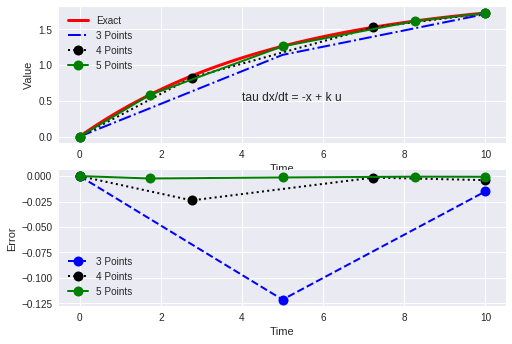

In [0]:
#@markdown ###Orthogonal Collocation 2

# Solve tau dx/dt = -x + k u
import numpy as np
from numpy.linalg import inv

## problem statement
x0 = 0.0  # initial condition
tf = 10.0 # final time
tau = 5.0 # model parameter (time constant)
k = 2.0   # gain

## analytic solution
time = np.linspace(0,tf)
x = k*(1.0-np.exp(-time/tau))

## numeric solutions
# 2nd order polynomial (3 points)
t2 = tf * np.array([0.0,0.5,1.0])
N2 = np.array([[0.75,-0.25], \
               [1.00, 0.00]])
M2 = inv(tf * N2)
# Solve linear system of equations by matrix manipulation
P2 = inv(tau*M2 + np.eye(2))
Q2 = np.dot(tau*M2,np.ones(2)*x0) + k*np.ones(2)
v2 = np.dot(P2, Q2)
x2 = np.insert(v2,0,x0)

# 3rd order polynomial (4 points)
t3 = tf * np.array([0.0, \
                    1.0/2.0-np.sqrt(5.0)/10.0, \
                    1.0/2.0+np.sqrt(5.0)/10.0, \
                    1.0])
N3 = np.array([[0.436,-0.281, 0.121], \
               [0.614, 0.064, 0.046], \
               [0.603, 0.230, 0.167]])
M3 = inv(tf * N3)
# Solve linear system of equations by matrix manipulation
P3 = inv(tau*M3 + np.eye(3))
Q3 = np.dot(tau*M3,np.ones(3)*x0) + k*np.ones(3)
v3 = np.dot(P3, Q3)
x3 = np.insert(v3,0,x0)

# 4th order polynomial (5 points)
t4 = tf * np.array([0.0, \
                    1.0/2.0-np.sqrt(21.0)/14.0, \
                    1.0/2.0, \
                    1.0/2.0+np.sqrt(21.0)/14.0, \
                    1.0])
N4 = np.array([[0.278, -0.202, 0.169, -0.071], \
               [0.398,  0.069, 0.064, -0.031], \
               [0.387,  0.234, 0.278, -0.071], \
               [0.389,  0.222, 0.389,  0.000]])
M4 = inv(tf * N4)
# Solve linear system of equations by matrix manipulation
P4 = inv(tau*M4 + np.eye(4))
Q4 = np.dot(tau*M4,np.ones(4)*x0) + k*np.ones(4)
v4 = np.dot(P4, Q4)
x4 = np.insert(v4,0,x0)

# compare results
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(time,x,'r-',linewidth=3)
plt.plot(t2,x2,'b-.',linewidth=2,markersize=20)
plt.plot(t3,x3,'k:.',linewidth=2,markersize=20)
plt.plot(t4,x4,'g.-',linewidth=2,markersize=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Exact','3 Points','4 Points','5 Points'])
plt.text(4,0.5,'tau dx/dt = -x + k u')

plt.subplot(2,1,2)
# exact solutions at collocation points
y2 = k*(1-np.exp(-t2/tau))
y3 = k*(1-np.exp(-t3/tau))
y4 = k*(1-np.exp(-t4/tau))
plt.plot(t2,x2-y2,'b--.',linewidth=2,markersize=20)
plt.plot(t3,x3-y3,'k:.',linewidth=2,markersize=20)
plt.plot(t4,x4-y4,'g.-',linewidth=2,markersize=20)
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend(['3 Points','4 Points','5 Points'])
plt.show()


In [0]:
#@title
%%html
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/orthogonal_collocation.zip' rel='nofollow'>Orthogonal Collocation in MATLAB</a></div>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/sxFTAF_xtLg?rel=0" frameborder="0" allowfullscreen></iframe>


##Exercise 1

Objective: Solve a differential equation with orthogonal collocation on finite elements. Create a MATLAB or Python script to simulate and display the results. Estimated Time: 2-3 hours

Solve the following differential equation from time 0 to 1 with orthogonal collocation on finite elements with 4 nodes for discretization in time.

$5 dx/dt = -x2 + u$
 
Specify the initial condition for x as 0 and the value of the input, u, as 4. Compare the solution result with 2-6 time points (nodes). Report the solution at the final time for each and comment on how the solution changes with an increase in the number of nodes.

In [0]:
#@title Solution 1

%%html
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/collocation_exercise.zip' rel='nofollow'>Collocation in MATLAB and Python (APM Solution)</a></div>



apm 35.199.184.117_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Variable time shift OFF
 Number of state variables:              2
 Number of total equations: -            2
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

****************************************************************************

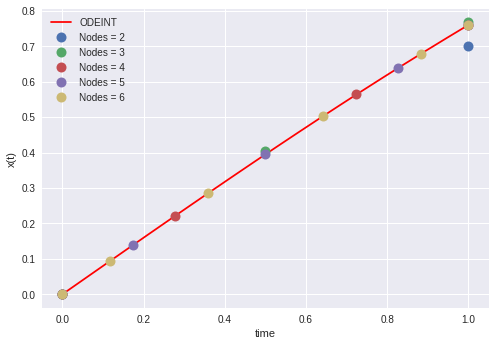

In [0]:
#@markdown Solution in GEKKO

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

from __future__ import division
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# final time
tf = 1.0

# solve with ODEINT (for comparison)
def model(x,t):
    u = 4.0
    return (-x**2 + u)/5.0
t = np.linspace(0,tf,20)
y0 = 0
y = odeint(model,y0,t)
plt.figure(1)
plt.plot(t,y,'r-',label='ODEINT')

# ----------------------------------------------------
# Approach #1 - Write the model equations in Python
# ----------------------------------------------------
# define collocation matrices
def colloc(n):
    if (n==2):
        NC = np.array([[1.0]])
    if (n==3):
        NC = np.array([[0.75,-0.25], \
                       [1.00, 0.00]])
    if (n==4):
        NC = np.array([[0.436,-0.281, 0.121], \
                       [0.614, 0.064, 0.0461], \
                       [0.603, 0.230, 0.167]])
    if (n==5):
        NC = np.array([[0.278, -0.202, 0.169, -0.071], \
                       [0.398,  0.069, 0.064, -0.031], \
                       [0.387,  0.234, 0.278, -0.071], \
                       [0.389,  0.222, 0.389,  0.000]])
    if (n==6):
        NC = np.array([[0.191, -0.147, 0.139, -0.113, 0.047],
                       [0.276,  0.059, 0.051, -0.050, 0.022],
                       [0.267,  0.193, 0.252, -0.114, 0.045],
                       [0.269,  0.178, 0.384,  0.032, 0.019],
                       [0.269,  0.181, 0.374,  0.110, 0.067]])
    return NC

# define collocation points from Lobatto quadrature
def tc(n):
    if (n==2):
        time = np.array([0.0,1.0])
    if (n==3):
        time = np.array([0.0,0.5,1.0])
    if (n==4):
        time = np.array([0.0, \
                         0.5-np.sqrt(5)/10.0, \
                         0.5+np.sqrt(5)/10.0, \
                         1.0])
    if (n==5):
        time = np.array([0.0,0.5-np.sqrt(21)/14.0, \
                         0.5,0.5+np.sqrt(21)/14.0, 1])
    if (n==6):
        time = np.array([0.0, \
                         0.5-np.sqrt((7.0+2.0*np.sqrt(7.0))/21.0)/2.0, \
                         0.5-np.sqrt((7.0-2.0*np.sqrt(7.0))/21.0)/2.0, \
                         0.5+np.sqrt((7.0-2.0*np.sqrt(7.0))/21.0)/2.0, \
                         0.5+np.sqrt((7.0+2.0*np.sqrt(7.0))/21.0)/2.0, \
                         1.0])
    return time*tf

# solve with SciPy fsolve
def myFunction(z,*param):
    n = param[0]
    m = param[1]
    # rename z as x and xdot variables
    x = np.empty(n-1)
    xdot = np.empty(n-1)
    x[0:n-1] = z[0:n-1]
    xdot[0:n-1] = z[n-1:m]

    # initial condition (x0)
    x0 = 0.0
    # input parameter (u)
    u = 4.0
    # final time
    tn = tf

    # function evaluation residuals
    F = np.empty(m)
    # nonlinear differential equations at each node
    # 5 dx/dt = -x^2 + u
    F[0:n-1] = 5.0 * xdot[0:n-1] + x[0:n-1]**2 - u
    # collocation equations
    # tn * NC * xdot = x - x0
    NC = colloc(n)
    F[n-1:m] = tn * np.dot(NC,xdot) - x + x0 * np.ones(n-1)
    return F

sol_py = np.empty(5) # store 5 results
for i in range(2,7):
    n = i
    m = (i-1)*2
    zGuess = np.ones(m)
    z = fsolve(myFunction,zGuess,args=(n,m))
    # add to plot
    yc = np.insert(z[0:n-1],0,0)
    plt.plot(tc(n),yc,'o',markersize=10,label='Nodes = '+str(i))
    # store just the last x[n] value
    sol_py[i-2] = z[n-2]
plt.legend(loc='best')

# ----------------------------------------------------
# Approach #2 - Write model in APMonitor and let
#   modeling language create the collocation equations
# ----------------------------------------------------
# load GEKKO
from gekko import GEKKO

sol_apm = np.empty(5) # store 5 results
i = 0
for nodes in range(2,7):
    m = GEKKO()

    u = m.Param(value=4)
    x = m.Var(value=0)
    m.Equation(5*x.dt() == -x**2 + u)

    m.time = [0,tf]

    m.options.imode = 4
    m.options.time_shift = 0
    m.options.nodes = nodes

    m.solve() # solve problem
    sol_apm[i] = x.value[-1] # store solution (last point)
    i += 1

# print the solutions
print(sol_py)
print(sol_apm)

# show plot
plt.ylabel('x(t)')
plt.xlabel('time')
plt.show()

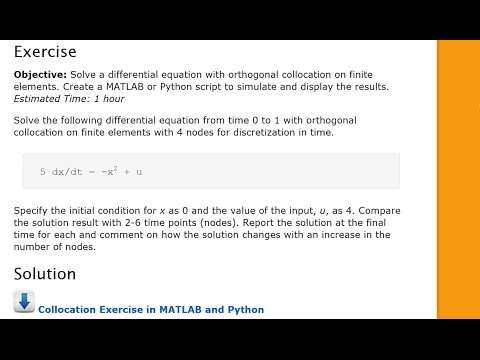

In [0]:
#@markdown Orthogonal Collocation Example Problem
YouTubeVideo('DBjmW4Lwpjc', width=600, height=400)

##Exercise 2

Compare orthogonal collocation on finite elements with 3 nodes with a numerical integrator (e.g. ODE15s in MATLAB or ODEINT in Python). Calculate the error at each of the solution points for the equation (same as for Exercise 1):

$5 dx/dt = -x2 + u$

In [0]:
#@title

%%html
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/collocation_compare.zip' rel='nofollow'>Collocation Solution (APM, ODE15s (MATLAB), ODEINT (Python))</a></div>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/8LmIqeuHGL0" frameborder="0" allowfullscreen></iframe>


In [0]:
#@markdown Solution ODEINT Python

from scipy.integrate import odeint
import numpy as np


def collocation(x,t):
    u = 4
    xdot = -x**2 / 5.0 + u / 5.0

    return xdot
  
y3 = odeint(collocation,[0],[0, 0.5, 1])

print('ODEINT solution')
print('x1 = ' + str(y3[1]))
print('x2 = ' + str(y3[2]))
print(' ')

ODEINT solution
x1 = [0.3947507]
x2 = [0.75989797]
 
